# user interface

> UI Prototypes and deployment

In [ ]:
#| default_exp app_gradio

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sbavery/pseudometer/blob/main/nbs/02_user_interface.ipynb)

In [ ]:
#| hide
## Google Colab / Installs
#!pip install gradio

In [ ]:
#| export
#| hide
import warnings
warnings.filterwarnings('ignore')
from fastai.text.all import *
from pseudometer.data import *
import gradio as gr
from wordcloud import WordCloud

## Gradio Prototype

In [ ]:
#| hide
#| export
categories = ('pseudoscience','science')
k = 30
min_words = 20
max_words = 450
ignore_text = ['the', 'of', 'to', 'and', 'a', 'in', 'it', 'that', 'for', 'on'] 
ignore_common = ignore_text
learn = load_learner('models/2022.12.01 Model v1 88pct', cpu=False)

def predict(url):
    page = get_page_all(url, k, max_words, ignore_text, ignore_common)
    length = len(page.cleaned_text)
    if  length < min_words:
        return "ERROR: Returned "+str(length)+" words"
    else:
        text = ' '.join(page.cleaned_text)
        with learn.no_bar(), learn.no_logging():
            pred,idx,probs = learn.predict(text)
        wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
                
        # plot the WordCloud image                      
        fig = plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        return (dict(zip(categories, map(float,probs))), fig)

{'pseudoscience': 0.0023253117688000202, 'science': 0.9976746439933777}


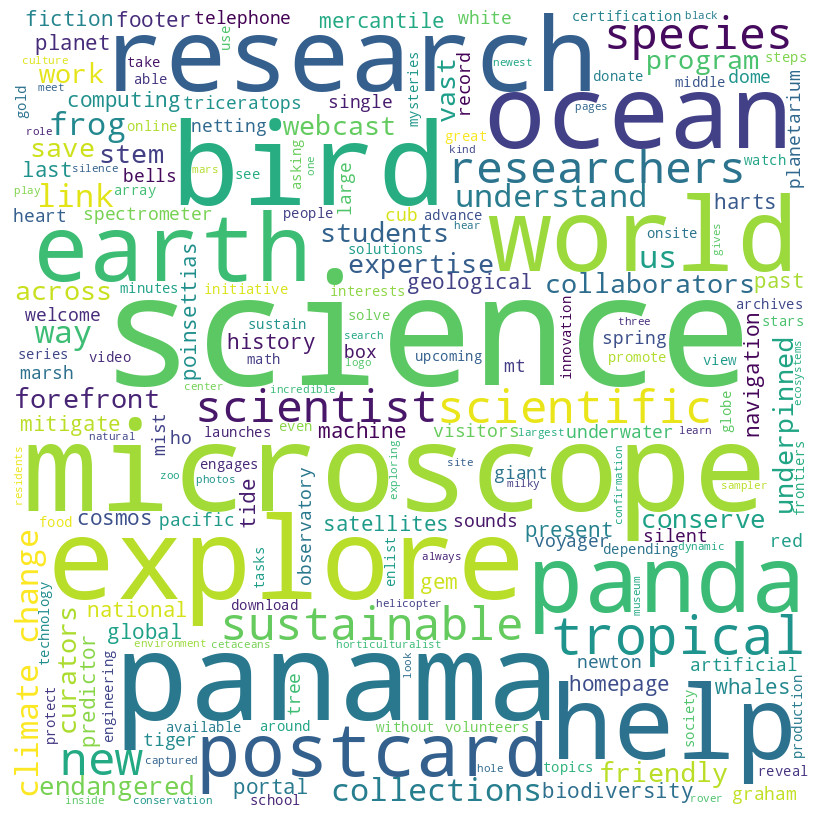

In [ ]:
d, fig = predict('https://www.si.edu/explore/science')
print(d)
fig.show()

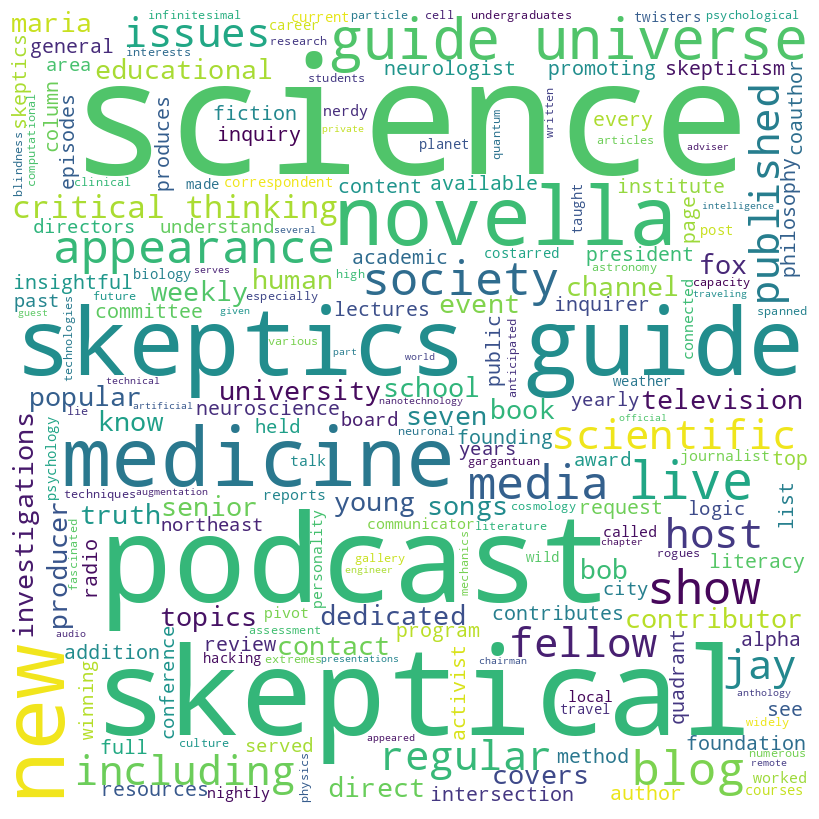

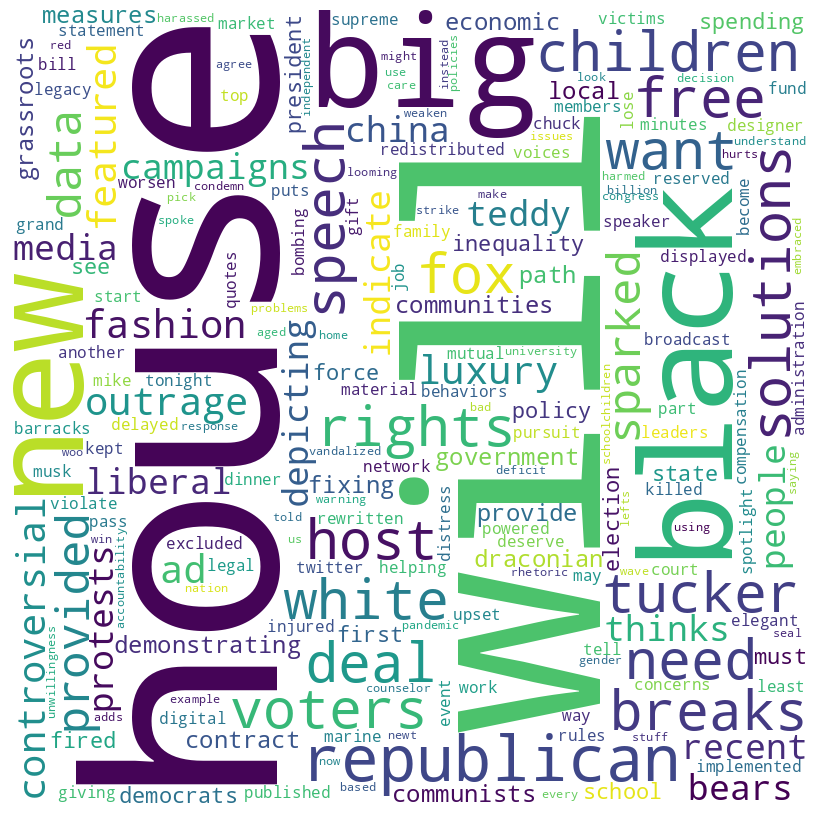

In [ ]:
#| hide
#text = gr.inputs.Textbox(1)
#label = gr.outputs.Label()
#examples = ['https://www.theskepticsguide.org/about','https://www.foxnews.com/opinion']

#intf = gr.Interface(fn=predict, inputs=text, outputs=label, examples=examples)
#intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


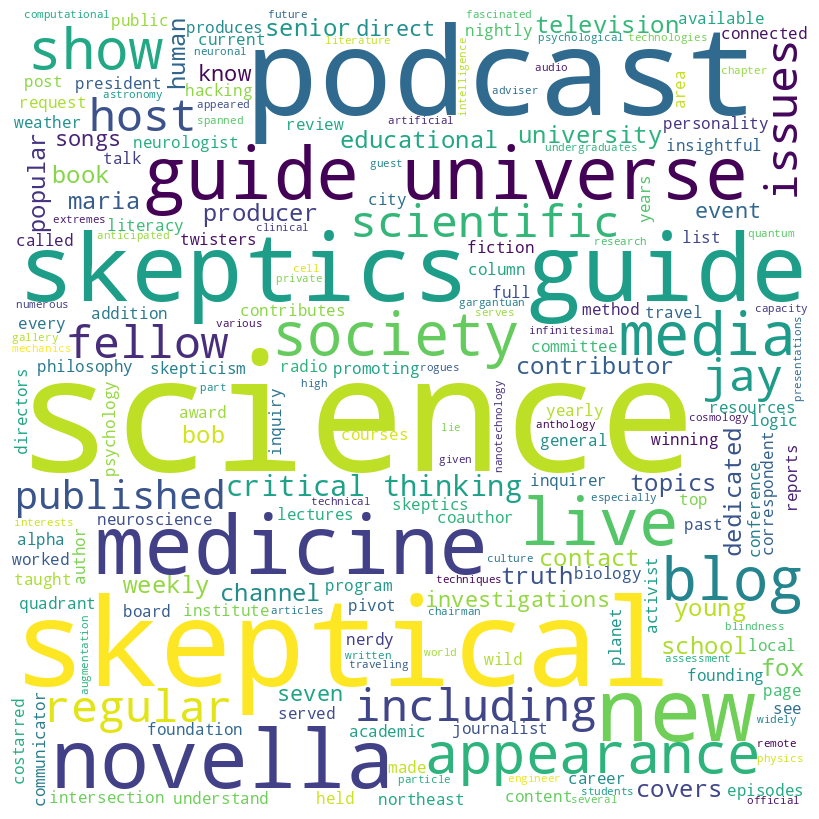

In [ ]:
#| export
examples = ['https://www.theskepticsguide.org/about','https://www.foxnews.com/opinion']

pseudo_sources = ["http://www.ageofautism.com/",
 "http://www.naturalnews.com", 
 "https://foodbabe.com/starthere/",
 "http://www.chopra.com",
 "https://www.mercola.com/",
 "https://www.history.com/",
 "https://doctoroz.com/",
 "https://www.disclose.tv/",
 "https://nationalreport.net/",
 "https://heartland.org/",
 "https://www.dailymail.co.uk/",
 "https://www.motherjones.com/"]

science_sources = ["https://sciencebasedmedicine.org/",
 "https://www.hopkinsmedicine.org/gim/research/method/ebm.html",
 "https://www.bbc.com/news/science_and_environment",
 "https://www.nature.com/",
 "https://www.science.org/",
 "https://www.snopes.com/top/",
 "https://quackwatch.org/",
 "https://www.skepdic.com/",
 "http://scibabe.com/",
 "http://pandasthumb.org/",
 "https://skepticalscience.com/",
 "https://www.cdc.gov/",
 "https://apnews.com/"]

with gr.Blocks() as blocks:
    gr.Markdown("# Pseudometer")
    gr.Markdown("Prototype machine learning pseudoscience detector for websites!")
    text = gr.Textbox(label="Input URL (http format):")
    label = gr.outputs.Label()
    btn = gr.Button("Analyze!")
    with gr.Accordion("Pseudoscience Primary Training Sources"):
        gr.Markdown(', '.join(pseudo_sources))
    with gr.Accordion("Science Primary Training Sources"):
        gr.Markdown(', '.join(science_sources))
    example = gr.Examples(examples=examples, inputs=text)

    btn.click(fn=predict, inputs=text, outputs=[label, gr.Plot(label="Wordcloud")])
    
blocks.launch()